In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

#定義LeNet模型

In [2]:
def LeNet(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

#創建和編譯模型

In [7]:
model = LeNet()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#加載MNIST數據

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


# 資料標準化

In [5]:
train_images = (train_images - 0.5) / 0.5
test_images = (test_images - 0.5) / 0.5

# 可視化一些訓練圖像

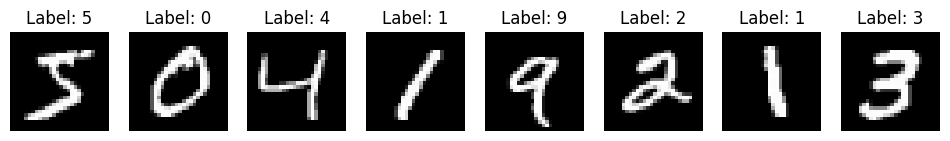

In [6]:
fig, axes = plt.subplots(1, 8, figsize=(12, 12))
for i in range(8):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Label: {train_labels[i]}')
    axes[i].axis('off')
plt.show()

#訓練模型

Epoch 1/10
938/938 [==============================] - 26s 26ms/step - loss: 0.2313 - accuracy: 0.9307 - val_loss: 0.0787 - val_accuracy: 0.9750
Epoch 2/10
938/938 [==============================] - 26s 28ms/step - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.0462 - val_accuracy: 0.9838
Epoch 3/10
938/938 [==============================] - 24s 25ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0478 - val_accuracy: 0.9853
Epoch 4/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0388 - accuracy: 0.9879 - val_loss: 0.0458 - val_accuracy: 0.9851
Epoch 5/10
938/938 [==============================] - 23s 24ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0372 - val_accuracy: 0.9880
Epoch 6/10
938/938 [==============================] - 24s 25ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0359 - val_accuracy: 0.9881
Epoch 7/10
938/938 [==============================] - 24s 25ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0437 - val_accuracy:

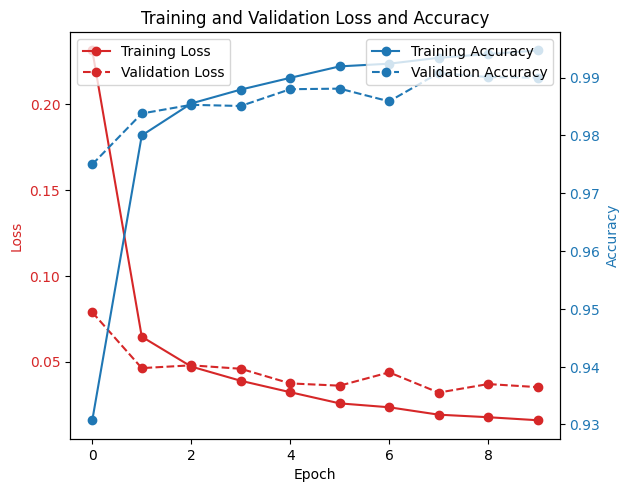

In [8]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# 可視化損失和準確率
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(history.history['loss'], marker='o', color=color, label='Training Loss')
ax1.plot(history.history['val_loss'], marker='o', linestyle='dashed', color=color, label='Validation Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(history.history['accuracy'], marker='o', color=color, label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], marker='o', linestyle='dashed', color=color, label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Training and Validation Loss and Accuracy')
plt.show()

#評估模型

313/313 - 1s - loss: 0.0351 - accuracy: 0.9900 - 1s/epoch - 5ms/step
Test accuracy: 0.9900000095367432
313/313 [==============================] - 2s 5ms/step


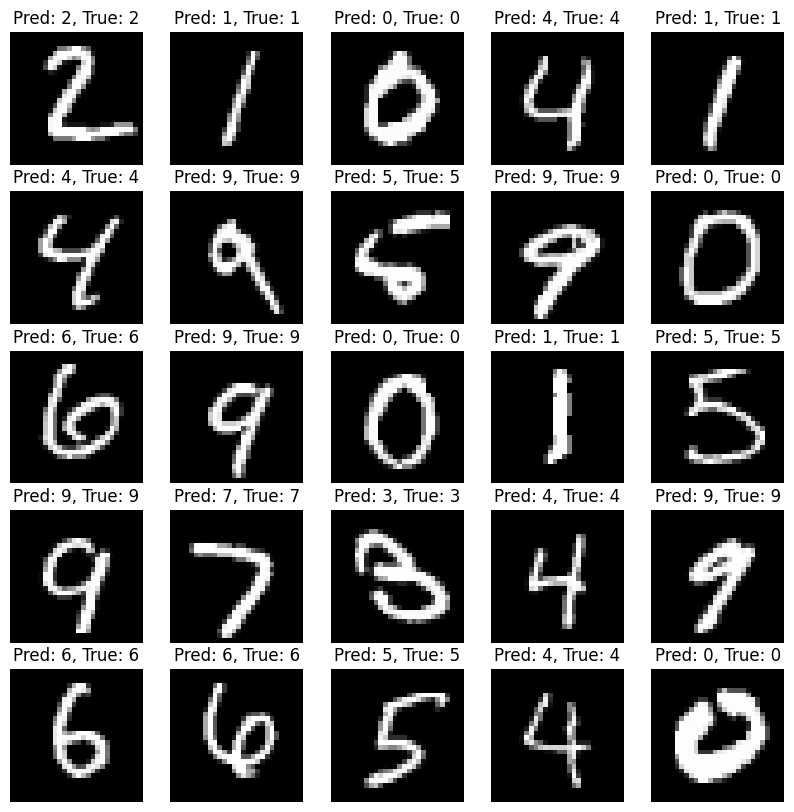

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# 可視化一些預測結果
predictions = model.predict(test_images)

fig = plt.figure(figsize=(10, 10))
for i in range(1, 26):
    ax = fig.add_subplot(5, 5, i)
    ax.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    ax.title.set_text(f'Pred: {pred_label}, True: {true_label}')
    ax.axis('off')
plt.show()